# 20. 편미방_Laplace

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$\frac {\partial^2 u} {\partial x^2} + \frac {\partial^2 u} {\partial y^2} = 0$$
### 20.1 함수값 경계 조건
$$u(0,y)=0,\;\; u(1,y)=0, \;\;u(x,0)=100,\;\;u(x,1)=200$$

- 풀이 영역 분할

In [67]:
pts = 21

x = np.linspace(0,1,pts)
y = np.linspace(0,1,pts)

xv, yv = np.meshgrid(x, y)

- u array 생성 및 경계값 부여, 계산 결과 array u_new 생성

In [70]:
u = np.zeros(xv.shape)
u[:,0] = 0; u[:,-1]=0; u[0,:] = 100; u[-1,:] = 200; u[0,0] = 50; u[0,-1] = 50; u[-1,0] =100; u[-1,-1] = 100

u_new = np.copy(u)

- Finite Difference 식에 따른 계산
> 수렴 여부 판단을 위한 변수 및 반복 횟수 변수 정의<br>
> 경계를 제외한 모든 내부 절점에서 매 Loop 완료 시 행렬 u update 및 du 계산

In [73]:
tol = 1.e-5; du = 1; niter = 0

while du > tol:
    for i in range(1,len(y)-1):
        for j in range(1,len(x)-1):
            u_new[i,j] = (u[i-1,j] + u[i+1,j] + u[i,j+1] + u[i,j-1])/4
    du = np.linalg.norm(u_new - u)
    u = np.copy(u_new)
    niter += 1

print(niter, du)

1149 9.933313812279257e-06


- 이론해 계산

In [81]:
u_exact = np.zeros(u.shape)

for n in range(1,30):
    npi = n*np.pi
    u_exact += 200*(1-(-1)**n)/npi * (
               np.cosh(npi*yv) + (2-np.cosh(npi))/np.sinh(npi) * np.sinh(npi*yv)
               ) * np.sin(npi*xv)

- 결과 비교

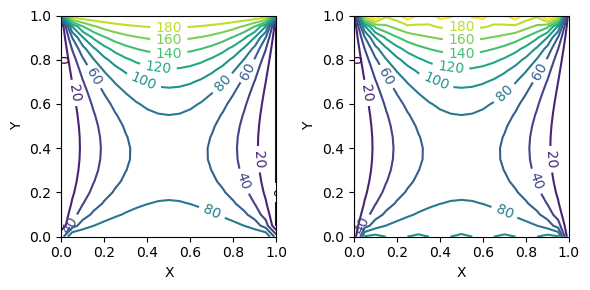

In [84]:
cval = np.linspace(0,200,11)

plt.figure(figsize = (6,3))

plt.subplot(1,2,1)
c1 = plt.contour(xv, yv, u, cval)
plt.clabel(c1, inline=True)
plt.xlabel("X")
plt.ylabel("Y")

plt.subplot(1,2,2)
c2 = plt.contour(xv, yv, u_exact, cval)
plt.clabel(c2, inline=True)
plt.xlabel("X")
plt.ylabel("Y")

plt.tight_layout()
plt.show()

### 20.2 도함수 경계 조건
$$u(0,y)=100,\;\;\frac {\partial u}{\partial x} (1,y)=0,\;\; u(x,0)=0,\;\; u(x,1)=0$$

- 풀이 영역 분할

In [104]:
pts = 21

x = np.linspace(0,1,pts)
y = np.linspace(0,1,pts)

xv, yv = np.meshgrid(x, y)

- u array에 초기값 및 경계값 부여, 계산 결과 array 생성

In [107]:
u = np.zeros(xv.shape)
u[:,0] = 100; u[0,:] = 0; u[-1,:] = 0; u[0,0] = 50; u[-1,0] = 50

u_new = np.copy(u)

- Finite Difference 식에 따른 계산
> 수렴 여부 판단을 위한 변수 및 반복 횟수 변수 정의<br>
> 경계를 제외한 모든 내부 절점에서 매 Loop 완료 시 행렬 u update 및 du 계산

In [110]:
tol = 1.e-10; du = 1; niter = 0

while du > tol:
    for i in range(1,len(y)-1):
        for j in range(1,len(x)):
            if j == len(x) - 1:
                u_new[i,j] = (2*u[i,j-1] + u[i-1,j] + u[i+1,j])/4
            else:
                u_new[i,j] = (u[i-1,j] + u[i+1,j] + u[i,j+1] + u[i,j-1])/4
    du = np.linalg.norm(u_new - u)
    u = np.copy(u_new)
    niter += 1

print(niter, du)

3103 9.945242028052766e-11


- 이론해 계산

In [113]:
u_exact = np.zeros(u.shape)

for n in range(1,20):
    npi = n*np.pi
    u_exact += 200*(1-(-1)**n)/npi* (
                np.cosh(npi*xv) - np.tanh(npi)*np.sinh(npi*xv)
                ) * np.sin(npi*yv)

- 결과 비교

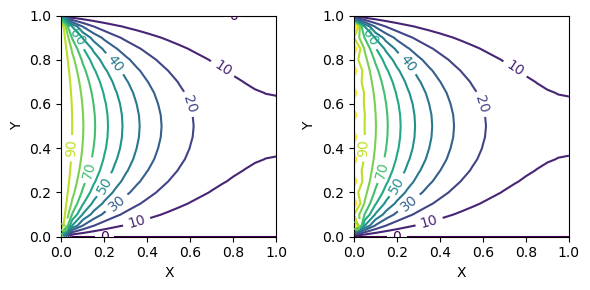

In [116]:
cval = np.linspace(0,100,11)

plt.figure(figsize = (6,3))

plt.subplot(1,2,1)
c1 = plt.contour(xv, yv, u, cval)
plt.clabel(c1, inline=True)
plt.xlabel("X")
plt.ylabel("Y")

plt.subplot(1,2,2)
c2 = plt.contour(xv, yv, u_exact, cval)
plt.clabel(c2, inline=True)
plt.xlabel("X")
plt.ylabel("Y")

plt.tight_layout()
plt.show()